In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [268]:
train1 = pd.read_csv('train_format1.csv')
train2 = pd.read_csv('train_format2.csv')
user_info = pd.read_csv('user_info_format1.csv')
user_log = pd.read_csv('user_log_format1.csv')

KeyboardInterrupt: 

In [195]:
m = train1['merchant_id'].value_counts()
#Merchants with >1000 customers
merchants = m[m>1000].keys()

In [196]:
#Restrict Training Data for the Merchants with > 1000 custs
train1 = train1[train1['merchant_id'].isin(merchants)]

print 'Raw Observations =',len(train1)
print 'Repeated Buyer Observations =',len(train1[train1['label'] == 1])

Raw Observations = 44834
Repeated Buyer Observations = 3192


In [197]:
users = train1['user_id'].values
user_info = user_info[user_info['user_id'].isin(users)]

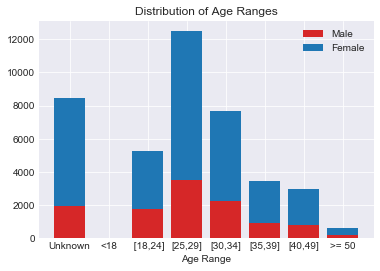

In [245]:
ind = np.arange(8)

male = user_info[user_info['gender'] == 1]['age_range'].value_counts()
female = user_info[user_info['gender'] == 0]['age_range'].value_counts()

male = male.set_value(1, 0).sort_index()
female = female.sort_index()
female[7] = female[7] + female[8]
male[7] = male[7] + male[8]

#User Age ranges
p1 = plt.bar(ind, male.values[:8], color='#d62728', label = 'Male')
p2 = plt.bar(ind, female.values[:8], bottom = male[:7], label = 'Female')
plt.title('Distribution of Age Ranges')
plt.xlabel('Age Range')
plt.xticks(ind, ('Unknown','<18', ' [18,24]', '[25,29]', '[30,34]', '[35,39]', '[40,49]', '>= 50'))
plt.legend()

In [199]:
users_info = user_info[user_info.age_range.notnull() & user_info.gender.notnull()]
users = user_info.user_id.values
user_log = user_log[user_log.user_id.isin(users) &  user_log.seller_id.isin(merchants)]

In [201]:
#Number of female repeated buyers
female_rb = user_info[user_info['gender'] == 0]['user_id'].values
num_frb = len(train1[train1.user_id.isin(female_rb) & train1['label'] == 1])

#Number of Age Range =3, repeated buyers
three_rb = user_info[user_info['age_range'] == 3]['user_id'].values
num_trb = len(train1[train1.user_id.isin(three_rb) & train1['label'] == 1])


929

In [183]:
#Interactions for Each User in log
interactions = user_log.user_id.value_counts()

In [269]:
feat = pd.read_csv('X_train_features_tmall.csv')

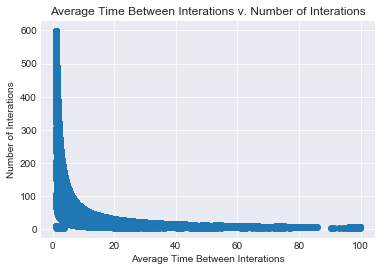

In [283]:
feat = feat[feat['avg_time'] < 100 ]

act =feat['action_0'] + feat['action_1'] + feat['action_2'] + feat['action_3']
time = feat['avg_time']

#select = np.random.randint(0,len(act),100)
#time = time[select]
#act = act[select]

plt.scatter(time, act)
plt.title('Average Time Between Interations v. Number of Interations')
plt.xlabel('Average Time Between Interations')
plt.ylabel('Number of Interations')